In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
# Загрузка данных из файла data.csv
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [4]:
# Вывод первых 5 строк на экран
print(df.head())

                        date  temperature_2m  relative_humidity_2m   
0  2021-06-07 00:00:00+00:00       17.647999              96.58553  \
1  2021-06-07 01:00:00+00:00       16.098000              99.68151   
2  2021-06-07 02:00:00+00:00       15.598000             100.00000   
3  2021-06-07 03:00:00+00:00       16.298000             100.00000   
4  2021-06-07 04:00:00+00:00       17.147999              98.42908   

   dew_point_2m  apparent_temperature  precipitation  rain  snowfall   
0     17.098000             19.352325            0.0   0.0       0.0  \
1     16.048000             17.098680            0.0   0.0       0.0   
2     15.598000             16.439842            0.0   0.0       0.0   
3     16.298000             17.833275            0.0   0.0       0.0   
4     16.897999             19.267359            0.0   0.0       0.0   

   snow_depth  cloud_cover  wind_speed_10m  wind_speed_100m   
0         0.0    10.500000        5.588703        13.779114  \
1         0.0    23.

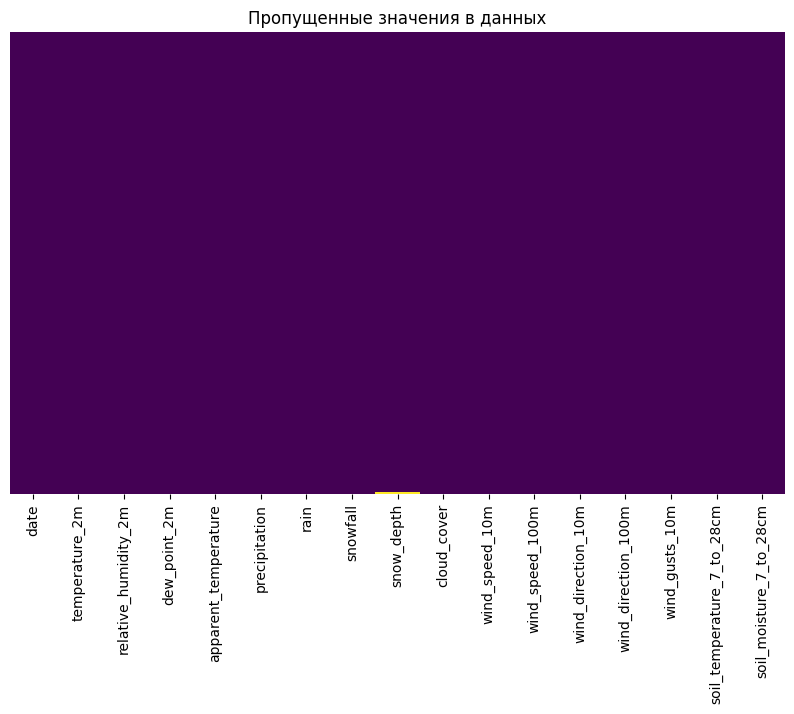

In [5]:
# Визуализация пустых значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Пропущенные значения в данных')
plt.show()

In [6]:
# Заполнение пропущенных значений медианой
median_snow_depth = df['snow_depth'].median()
df['snow_depth'].fillna(median_snow_depth, inplace=True)
print("Количество пропущенных значений в snow_depth после заполнения:", df['snow_depth'].isnull().sum())

Количество пропущенных значений в snow_depth после заполнения: 0


<Figure size 1500x1000 with 0 Axes>

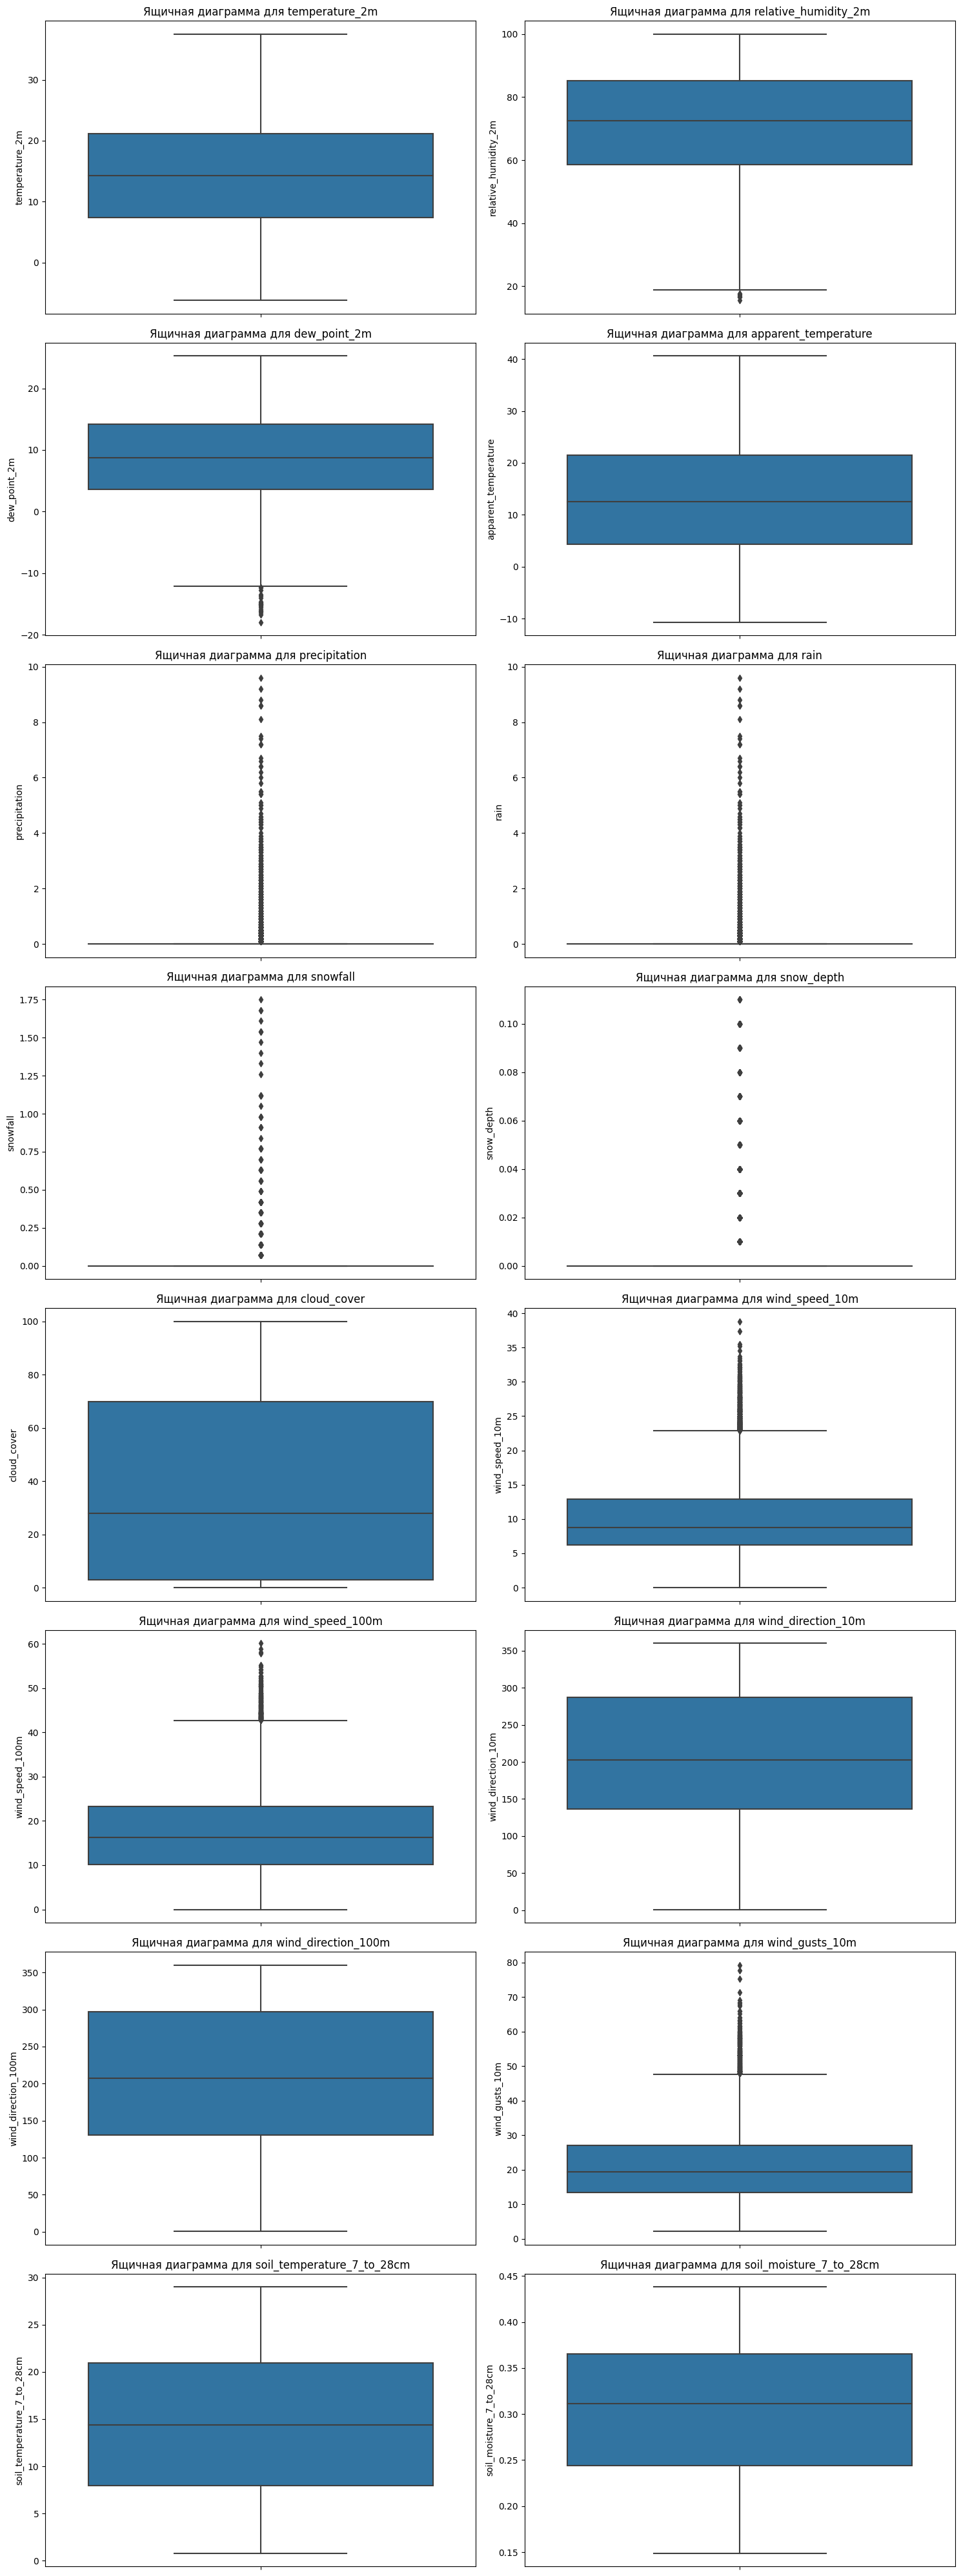

In [7]:
# Установим размер графиков для лучшей визуализации
plt.figure(figsize=(15, 10))

# Построим ящичные диаграммы для всех числовых столбцов
numeric_columns = df.select_dtypes(include=['float64']).columns

# Создаем несколько подграфиков (по два столбца на график для удобства)
num_plots = len(numeric_columns)
fig, axes = plt.subplots(num_plots // 2, 2, figsize=(15, 5 * (num_plots // 2)))

# Плоский список осей для удобства итерации
axes = axes.flatten()

# Построение графиков
for i, column in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], y=df[column])
    axes[i].set_title(f'Ящичная диаграмма для {column}')

# Отключение ненужных осей
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [8]:
# Функция для выявления выбросов на основе IQR
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [9]:
# Выявим выбросы
outliers = detect_outliers_iqr(df)

In [10]:
# Количество выбросов в каждом столбце
outliers_count = {column: len(outliers[column]) for column in outliers}
print(outliers_count)

{'temperature_2m': 0, 'relative_humidity_2m': 7, 'dew_point_2m': 22, 'apparent_temperature': 0, 'precipitation': 3343, 'rain': 3077, 'snowfall': 359, 'snow_depth': 1933, 'cloud_cover': 0, 'wind_speed_10m': 655, 'wind_speed_100m': 239, 'wind_direction_10m': 0, 'wind_direction_100m': 0, 'wind_gusts_10m': 505, 'soil_temperature_7_to_28cm': 0, 'soil_moisture_7_to_28cm': 0}


In [11]:
# Заменим выбросы на медианные значения
def replace_outliers_with_median(df):
    for column in df.select_dtypes(include=['float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[column].median()
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median
    return df

In [12]:
# Замена выбросов
data_cleaned = replace_outliers_with_median(df)

In [13]:
# Проверка замены
outliers_cleaned = detect_outliers_iqr(data_cleaned)
outliers_cleaned_count = {column: len(outliers_cleaned[column]) for column in outliers_cleaned}
print(outliers_cleaned_count)

{'temperature_2m': 0, 'relative_humidity_2m': 0, 'dew_point_2m': 0, 'apparent_temperature': 0, 'precipitation': 0, 'rain': 0, 'snowfall': 0, 'snow_depth': 0, 'cloud_cover': 0, 'wind_speed_10m': 258, 'wind_speed_100m': 47, 'wind_direction_10m': 0, 'wind_direction_100m': 0, 'wind_gusts_10m': 190, 'soil_temperature_7_to_28cm': 0, 'soil_moisture_7_to_28cm': 0}


In [14]:
# Нормализация данных
scaler = MinMaxScaler()
data_normalized = df.copy()
data_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [15]:
# Вывод первых 5 строк нормализованных данных
print(data_normalized.head())

                        date  temperature_2m  relative_humidity_2m   
0  2021-06-07 00:00:00+00:00        0.545767              0.957933  \
1  2021-06-07 01:00:00+00:00        0.510297              0.996076   
2  2021-06-07 02:00:00+00:00        0.498856              1.000000   
3  2021-06-07 03:00:00+00:00        0.514874              1.000000   
4  2021-06-07 04:00:00+00:00        0.534325              0.980646   

   dew_point_2m  apparent_temperature  precipitation  rain  snowfall   
0      0.782086              0.585805            0.0   0.0       0.0  \
1      0.754011              0.541825            0.0   0.0       0.0   
2      0.741979              0.528968            0.0   0.0       0.0   
3      0.760695              0.556160            0.0   0.0       0.0   
4      0.776738              0.584146            0.0   0.0       0.0   

   snow_depth  cloud_cover  wind_speed_10m  wind_speed_100m   
0         0.0        0.105        0.244090         0.322451  \
1         0.0       

In [16]:
# Стандартизация данных
scaler = StandardScaler()
data_standardized = df.copy()
data_standardized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [17]:
# Вывод первых 5 строк стандартизованных данных
print(data_standardized.head())

                        date  temperature_2m  relative_humidity_2m   
0  2021-06-07 00:00:00+00:00        0.385113              1.502382  \
1  2021-06-07 01:00:00+00:00        0.207382              1.684327   
2  2021-06-07 02:00:00+00:00        0.150049              1.703044   
3  2021-06-07 03:00:00+00:00        0.230315              1.703044   
4  2021-06-07 04:00:00+00:00        0.327780              1.610724   

   dew_point_2m  apparent_temperature  precipitation  rain  snowfall   
0      1.246640              0.604716            0.0   0.0       0.0  \
1      1.093719              0.392767            0.0   0.0       0.0   
2      1.028181              0.330805            0.0   0.0       0.0   
3      1.130128              0.461853            0.0   0.0       0.0   
4      1.217512              0.596725            0.0   0.0       0.0   

   snow_depth  cloud_cover  wind_speed_10m  wind_speed_100m   
0         0.0    -0.736895       -0.864973        -0.372905  \
1         0.0    -0.

In [18]:
# Сохранение нормализованных данных
data_normalized.to_csv('data_normalized.csv', index=False)

In [19]:
# Сохранение стандартизованных данных
data_standardized.to_csv('data_standardized.csv', index=False)

In [7]:
# Загрузка стандартизованных данных
file_path = 'data_standardized.csv'
df2 = pd.read_csv(file_path)

In [8]:
# Выделение признаков и целевых переменных
X = df2[['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'snowfall', 'snow_depth', 'cloud_cover', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_7_to_28cm', 'soil_moisture_7_to_28cm']]
y = df2[['rain', 'wind_speed_10m', 'wind_direction_10m']]

In [9]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
import xgboost as xgb

# Инициализация модели XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100, random_state=42)

In [24]:
# Обучение модели на обучающей выборке
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Предсказания на тестовой выборке
y_pred = xgb_model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Коэффициент детерминации (R^2): {r2}')


Среднеквадратичная ошибка (MSE): 6.179133851861554e-05
Коэффициент детерминации (R^2): 0.6666058897972107


Это означает, что модель объясняет примерно 66.7% вариативности целевых переменных на тестовой выборке.

In [26]:
from sklearn.metrics import mean_absolute_error

# Расчет MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Средняя абсолютная ошибка (MAE): {mae}')


Средняя абсолютная ошибка (MAE): 0.004660778795957767


In [27]:
# Расчет MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape}%')

Средняя абсолютная процентная ошибка (MAPE): inf%


Получение значения "inf" для средней абсолютной процентной ошибки (MAPE) указывает на то, что в процессе расчёта произошло деление на ноль. Это обычно случается, если в  тестовых данных (`y_test`) присутствуют нулевые значения. Для корректного расчёта MAPE в таких случаях можно добавить небольшую константу к знаменателю, чтобы избежать деления на ноль.

In [28]:
# Добавляем небольшую константу к знаменателю для избежания деления на ноль
mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape}%')

Средняя абсолютная процентная ошибка (MAPE): 63.25762830368824%


In [29]:
from sklearn.model_selection import GridSearchCV

# Сетка параметров для поиска
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}

# Поиск лучших параметров
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2')

grid_search.fit(X_train, y_train)
print(f'Лучшие параметры: {grid_search.best_params_}')


Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


In [30]:
# Обучение модели с лучшими параметрами
final_model = xgb.XGBRegressor(learning_rate=0.05, max_depth=4, n_estimators=200, objective='reg:squarederror', random_state=42)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [31]:
# Предсказания на тестовой выборке
y_pred_final = final_model.predict(X_test)


In [32]:
# Оценка производительности окончательной модели
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)
mae_final = mean_absolute_error(y_test, y_pred_final)
mape_final = np.mean(np.abs((y_test - y_pred_final) / (y_test + 1e-8))) * 100

print(f'Среднеквадратичная ошибка (MSE): {mse_final}')
print(f'Коэффициент детерминации (R^2): {r2_final}')
print(f'Средняя абсолютная ошибка (MAE): {mae_final}')
print(f'Средняя абсолютная процентная ошибка (MAPE): {mape_final}%')

Среднеквадратичная ошибка (MSE): 3.407725276843604e-05
Коэффициент детерминации (R^2): 0.6666333079338074
Средняя абсолютная ошибка (MAE): 0.002922776545112915
Средняя абсолютная процентная ошибка (MAPE): 81.68446668303243%


- Среднеквадратичная ошибка (MSE) уменьшилась с 6.179133851861554e-05 до 3.407725276843604e-05, что является улучшением.
- Коэффициент детерминации (R^2) остался практически неизменным, указывая на то, что модель объясняет примерно 66.7% дисперсии целевой переменной.
- Средняя абсолютная ошибка (MAE) уменьшилась, что также указывает на улучшение.
- Средняя абсолютная процентная ошибка (MAPE) увеличилась до 81.68%, что указывает на достаточно высокую относительную ошибку предсказаний модели по сравнению с истинными значениями.

Случайный лес — это ансамблевая модель, основанная на деревьях решений. Она хорошо работает на большинстве задач и является одним из самых популярных методов машинного обучения благодаря своей способности улавливать сложные зависимости без необходимости сложной настройки.

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Инициализация модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [34]:
# Обучение модели
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Предсказание на тестовых данных
y_pred_rf = rf_model.predict(X_test)

In [36]:
# Оценка производительности
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Среднеквадратичная ошибка (Random Forest MSE): {mse_rf}')
print(f'Коэффициент детерминации (Random Forest R^2): {r2_rf}')

Среднеквадратичная ошибка (Random Forest MSE): 7.348957025115072e-05
Коэффициент детерминации (Random Forest R^2): 0.999927132612766


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Определение модели
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))


In [11]:
# Компиляция модели
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# Обучение модели
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 2s 552us/step - loss: 0.0762
Epoch 2/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 0.0012
Epoch 3/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - loss: 5.2394e-04
Epoch 4/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - loss: 3.3181e-04
Epoch 5/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - loss: 2.1194e-04
Epoch 6/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - loss: 1.4827e-04
Epoch 7/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - loss: 1.2948e-04
Epoch 8/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - loss: 1.1863e-04
Epoch 9/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - loss: 1.0253e-04
Epoch 10/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - loss: 6.9990e-05
Epoch 11/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - loss: 7.2805e-05
Epoch 12/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - loss: 7.2646e-05
Epoch 13/50
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - loss: 9.4874e-05
Epoch 14/50
2134/2134 ━━━━━━━

In [13]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Оценка производительности
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Коэффициент детерминации (R^2): {r2}')



Среднеквадратичная ошибка (MSE): 5.240807627664002e-06
Средняя абсолютная ошибка (MAE): 0.0015934886931284681
Коэффициент детерминации (R^2): 0.6666616201400757


результаты показывают, что модель имеет достаточно низкую среднеквадратичную ошибку (MSE) и среднюю абсолютную ошибку (MAE), что указывает на хорошую точность предсказаний в абсолютных значениях. Коэффициент детерминации (R^2) около 0.67 говорит о том, что модель объясняет примерно 66.7% дисперсии целевой переменной, что может быть приемлемым в зависимости от сложности задачи и доступности данных.
